In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler

In [22]:
#regression models.

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso, Ridge, ElasticNet, Lars, SGDRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor

import warnings
warnings.filterwarnings('ignore')

In [23]:
automobile_df = pd.read_csv('datasets/auto-processed.csv')

automobile_df.head()

,wheel-base,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,...,engine-type_ohc,engine-type_ohcf,engine-type_ohcv,fuel-system_1bbl,fuel-system_2bbl,fuel-system_idi,fuel-system_mfi,fuel-system_mpfi,fuel-system_spdi,fuel-system_spfi
0,114.2,3485,152,3.70,3.52,21.0,95.0,4150.0,25,25,...,0,0,0,0,0,1,0,0,0,0
1,101.2,2395,108,3.50,2.80,8.8,101.0,5800.0,23,29,...,1,0,0,0,0,0,0,1,0,0
2,98.4,2536,146,3.62,3.50,9.3,116.0,4800.0,24,30,...,1,0,0,0,0,0,0,1,0,0
3,110.0,3505,209,3.62,3.39,8.0,182.0,5400.0,15,20,...,1,0,0,0,0,0,0,1,0,0
4,96.3,2328,122,3.35,3.46,8.5,88.0,5000.0,25,32,...,1,0,0,0,1,0,0,0,0,0


In [24]:
target_city = 'city-mpg'
features = ['wheel-base', 'curb-weight', 'engine-size', 'bore', 'stroke',
       'compression-ratio', 'horsepower', 'peak-rpm', 'price', 'num-of-cylinders', 'fuel-type_diesel',
       'fuel-type_gas', 'aspiration_std', 'aspiration_turbo', 'drive-wheels_4wd', 'drive-wheels_fwd', 
       'drive-wheels_rwd','engine-location_front', 'engine-location_rear', 'engine-type_dohc',
       'engine-type_l', 'engine-type_ohc', 'engine-type_ohcf', 'engine-type_ohcv', 'fuel-system_1bbl', 
       'fuel-system_2bbl', 'fuel-system_idi', 'fuel-system_mfi', 'fuel-system_mpfi',
       'fuel-system_spdi', 'fuel-system_spfi']
target_highway = 'highway-mpg'

In [25]:
result_dict = {}

In [26]:
def build_model(regression_fn, 
                name_Y,
                name_X,
                dataset,
                test_frac = 0.2,
                preprocess_fn = None, 
                show_plot_Y = False,
                show_plot_scatter = False):
    X = dataset[name_X]
    Y = dataset[name_Y]

    x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=test_frac)
    
    if preprocess_fn is not None:
        x_train, x_test = preprocess_fn(x_train, x_test)

    model = regression_fn(x_train, y_train)
    y_pred = model.predict(x_test)

    print(f'Training score : {model.score(x_train, y_train)}')
    print(f'Test score : {r2_score(y_test, y_pred)}')

    if show_plot_Y == True:
        fis, ax = plt.subplots(figsize = (8, 5))
        plt.plot(y_pred, label = 'Prediction')
        plt.plot(y_test.values, label = 'Actual')
        plt.ylabel(name_Y)
        plt.legend()
        plt.show()

    if show_plot_scatter == True:
        fis, ax = plt.subplots(figsize = (8, 5))
        plt.scatter(x_test, y_test)
        plt.plot(x_test, y_pred, 'r')
    
        plt.legend(['Predicted line', 'Observed line'])
        plt.show()

    return {
        'training score': model.score(x_train, y_train),
        'test score': r2_score(y_test, y_pred)
    }

In [27]:
def compare_results():
    for key in result_dict:
        print('Regression: ', key)
        print('Training score: ', result_dict[key]['training score'])
        print('Test score : ', result_dict[key]['test score'])
        print()

In [28]:
def linear_reg(x_train, y_train):
    model = LinearRegression()
    model.fit(x_train, y_train)
    return model

In [29]:
def preprocess_fn(x_train, x_test):
    scaler = StandardScaler()
    x_train = scaler.fit_transform(x_train)
    x_test = scaler.transform(x_test)

    return x_train, x_test    

Training score : 0.6911723644135334
Test score : 0.7013547581799866


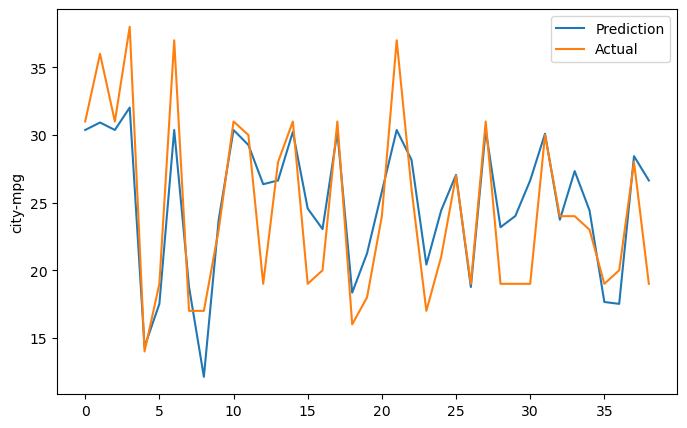

In [30]:
result_dict['city mpg - single_linear'] = build_model(linear_reg,
                                                      'city-mpg',
                                                      ['horsepower'],
                                                      automobile_df,
                                                      preprocess_fn=preprocess_fn,
                                                      show_plot_Y = True)

Training score : 0.8897736825291852
Test score : 0.7924153613021131


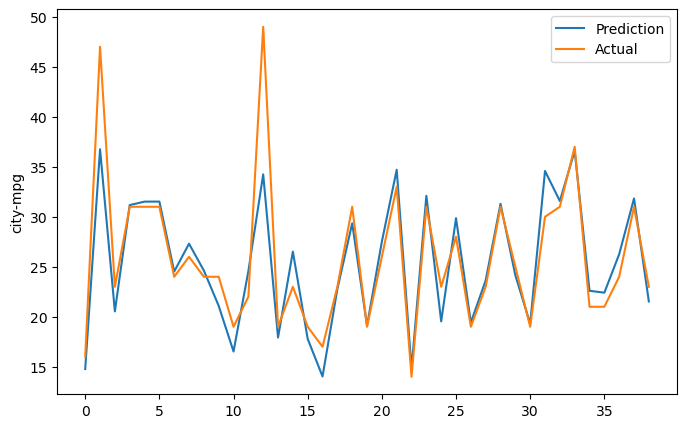

In [31]:
result_dict['city mpg - kitchen_sink_linear'] = build_model(linear_reg,
                                                            name_X=features,
                                                            name_Y=target_city,
                                                            dataset=automobile_df, 
                                                            preprocess_fn=preprocess_fn,
                                                            show_plot_Y=True)                                                     
                                                     

In [32]:
## Lasso regression 

def lasso_reg(x_train, y_train, alpha = 0.5):
    model = Lasso(alpha=alpha)
    model.fit(x_train, y_train)
    return model

Training score : 0.8483282474008866
Test score : 0.7245344791311247


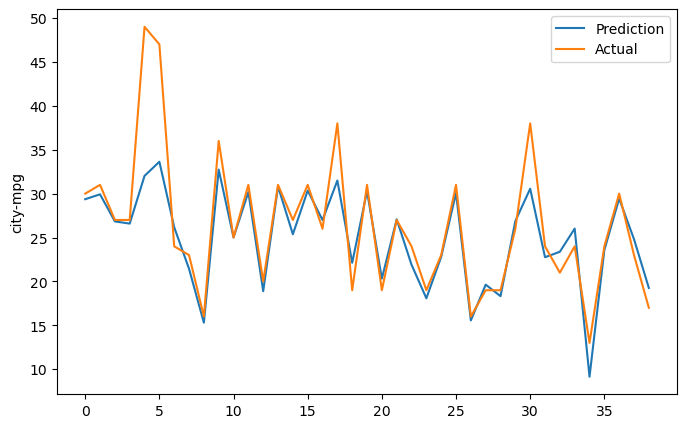

In [33]:
result_dict['city mpg - kitchen_sink_lasso'] = build_model(lasso_reg,
                                                            name_Y=target_city,
                                                            name_X=features,
                                                            dataset=automobile_df,
                                                            preprocess_fn=preprocess_fn,
                                                            show_plot_Y=True)

In [34]:
def ridge_reg(x_train, y_train, alpha = 0.5, normalize = True):
    model = Ridge(alpha=alpha, normalize=normalize)
    model.fit(x_train, y_train)
    return model

Training score : 0.8328325479005178
Test score : 0.8145477634453634


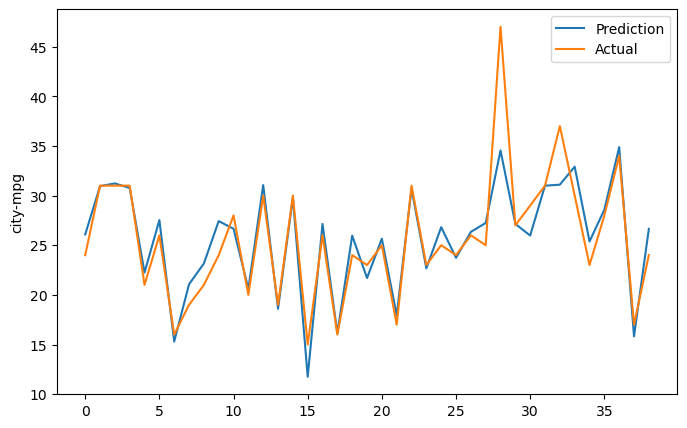

In [35]:
result_dict['city mpg - kitchen_sink_ridge'] = build_model(lasso_reg,
                                                            name_Y=target_city,
                                                            name_X=features,
                                                            dataset=automobile_df,
                                                            preprocess_fn=preprocess_fn,
                                                            show_plot_Y=True)

In [36]:
#alpha: determines strength of regularization.
#l1_ratio: elastic net mixing parameter, to tweak combination of l1 or l2 to apply.
#In a typical optimization process, when you want to train an Elastic Net regression model, 
#we start with some initial values for the coefficients and hyperparameters.
#warmstart: initialize the optimization process with the solution obtained from a previous run.
#equivalent_to: explicitly passed when the function isinvoked

def elastic_net_reg(x_train, y_train, alpha=1, l1_ratio=0.5, max_iter = 100000, warm_start = True,
                    equivalent_to ='Elastic Net'):
    print(f'Equivalent to: {equivalent_to}')
    model = ElasticNet(alpha= alpha, l1_ratio=l1_ratio, max_iter=max_iter, warm_start=warm_start)
    model.fit(x_train, y_train)
    return model


Equivalent to: OLS
Training score : 0.8682743847740685
Test score : 0.8925287939146029


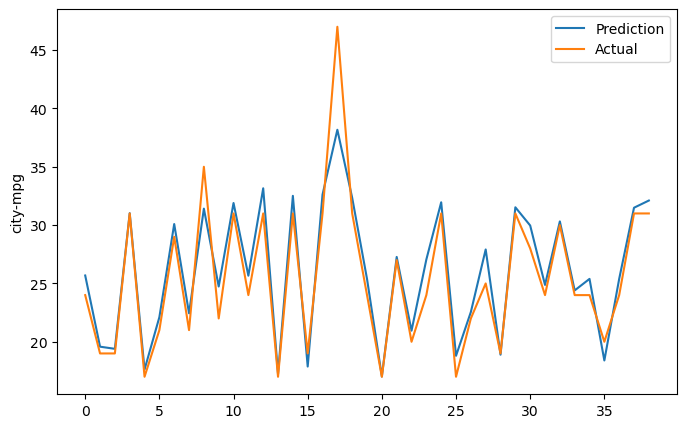

In [37]:
#tweak the value of parameters to pass in function
from functools import partial

result_dict['city mpg - kitchen_sink_elastic_net_reg_OLS'] = build_model(partial(
                                                            elastic_net_reg,
                                                            alpha=0, #no penalty imposed on training model
                                                            equivalent_to="OLS"),
                                                            #OLS: Ordinary Least Squares, or simple linear model
                                                            name_Y=target_city,
                                                            name_X=features,
                                                            dataset=automobile_df,
                                                            preprocess_fn=preprocess_fn,
                                                            show_plot_Y=True)

Equivalent to: Lasso
Training score : 0.7886929231451968
Test score : 0.76252921681055


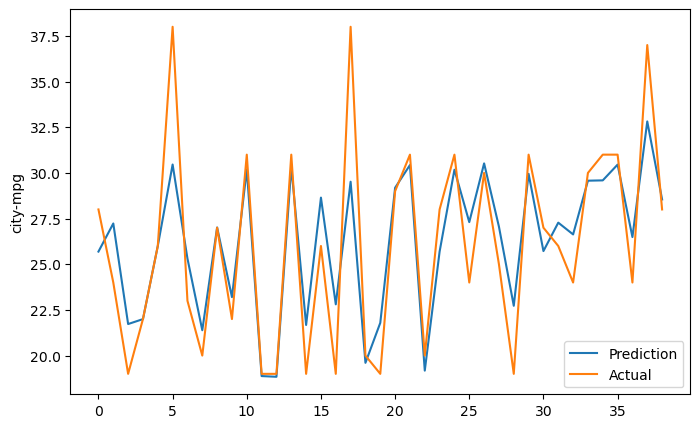

In [38]:

result_dict['city mpg - kitchen_sink_elastic_net_reg_Lasso'] = build_model(partial(
                                                            elastic_net_reg,
                                                            alpha=1, 
                                                            l1_ratio = 1,
                                                            equivalent_to="Lasso"),                                                    
                                                            name_Y=target_city,
                                                            name_X=features,
                                                            dataset=automobile_df,
                                                            preprocess_fn=preprocess_fn,
                                                            show_plot_Y=True)

Equivalent to: Ridge
Training score : 0.8333014344473526
Test score : 0.682002566601277


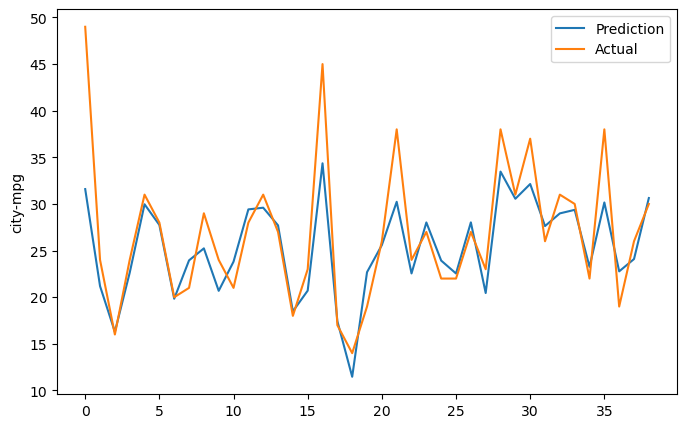

In [39]:
result_dict['city mpg - kitchen_sink_elastic_net_reg_Ridge'] = build_model(partial(
                                                            elastic_net_reg,
                                                            alpha=1, 
                                                            l1_ratio = 0,
                                                            equivalent_to="Ridge"),                                                    
                                                            name_Y=target_city,
                                                            name_X=features,
                                                            dataset=automobile_df,
                                                            preprocess_fn=preprocess_fn,
                                                            show_plot_Y=True)

In [40]:
# SVR or linear SVR
# LinearSVR == SVR(kernel = 'linear')
# c = 0.3, penalty
def svr_reg(x_train, y_train, kernel='linear', epsilon = 0.05, c=0.3):
    model = SVR(kernel=kernel, epsilon=epsilon, C=c)
    model.fit(x_train,y_train)
    return model

In [41]:
def knn_reg(x_train, y_train, n_neighbors = 5):
    model = KNeighborsRegressor(n_neighbors=n_neighbors)
    model.fit(x_train, y_train)
    return model

In [42]:
def sgd_reg(x_train, y_train, max_iter = 10000, tol = 1e-3):
    model = SGDRegressor(max_iter=max_iter, tol=tol)
    model.fit(x_train, y_train)
    return model

In [43]:
def decision_tree_reg(x_train, y_train, max_depth = 2):
    model = DecisionTreeRegressor(max_depth=max_depth)
    model.fit(x_train, y_train)
    return model

In [44]:
#n_nonzero_coef=4, controls the sparsity of the model.
#start model at 0 and continue till 4 coefficients is added.
def lars_reg(x_train, y_train, n_nonzero_coef=8):
    model = Lars(n_nonzero_coefs=n_nonzero_coef)
    model.fit(x_train, y_train)
    return model

In [45]:
models = [svr_reg, sgd_reg, decision_tree_reg, lars_reg]

In [46]:
def build_all_model(models):
    for model in models:
        print(f'current model is : {model.__name__}')
        result_dict['city mpg - ' + model.__name__.upper()] = build_model(regression_fn=model,
                                                    name_Y=target_city,
                                                    name_X=features,
                                                    dataset=automobile_df,
                                                    preprocess_fn=preprocess_fn,
                                                    show_plot_Y=True)


current model is : svr_reg
Training score : 0.859926318171982
Test score : 0.7586283958863217


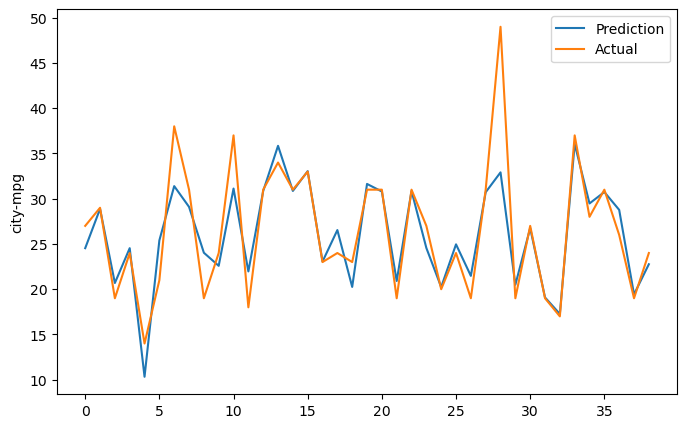

current model is : sgd_reg
Training score : 0.865917646266187
Test score : 0.7831565526971582


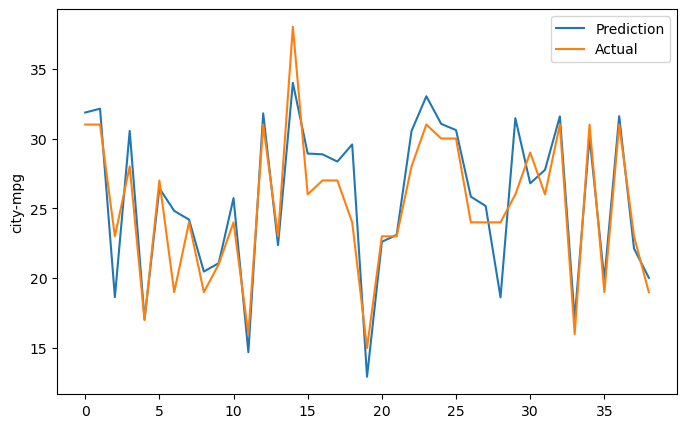

current model is : decision_tree_reg
Training score : 0.8264040906418137
Test score : 0.7024396065281373


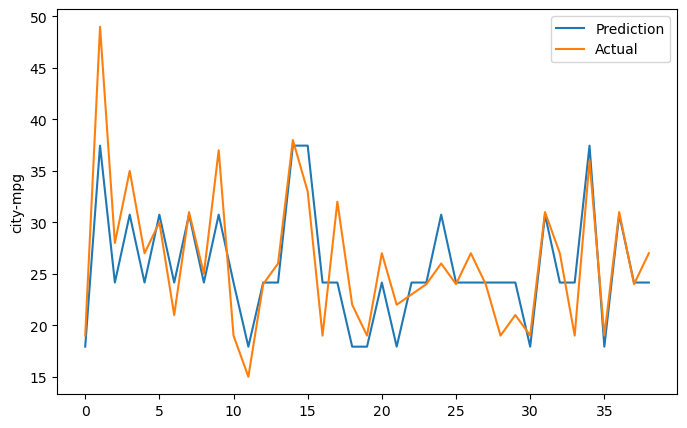

current model is : lars_reg
Training score : 0.8225715650600279
Test score : 0.915792598411755


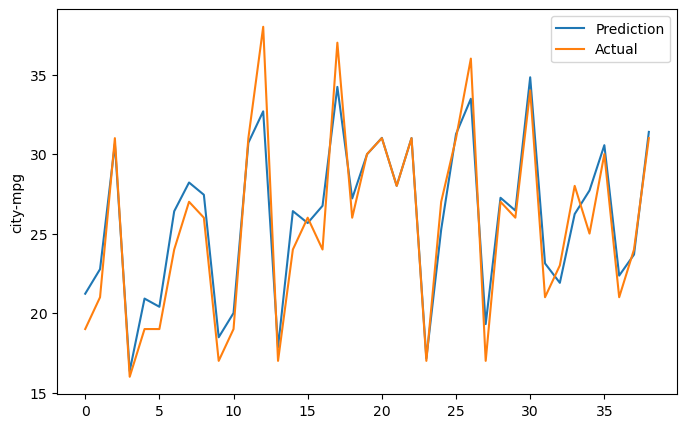

In [47]:
build_all_model(models)

In [48]:
compare_results()

Regression:  city mpg - single_linear
Training score:  0.6911723644135334
Test score :  0.7013547581799866

Regression:  city mpg - kitchen_sink_linear
Training score:  0.8897736825291852
Test score :  0.7924153613021131

Regression:  city mpg - kitchen_sink_lasso
Training score:  0.8483282474008866
Test score :  0.7245344791311247

Regression:  city mpg - kitchen_sink_ridge
Training score:  0.8328325479005178
Test score :  0.8145477634453634

Regression:  city mpg - kitchen_sink_elastic_net_reg_OLS
Training score:  0.8682743847740685
Test score :  0.8925287939146029

Regression:  city mpg - kitchen_sink_elastic_net_reg_Lasso
Training score:  0.7886929231451968
Test score :  0.76252921681055

Regression:  city mpg - kitchen_sink_elastic_net_reg_Ridge
Training score:  0.8333014344473526
Test score :  0.682002566601277

Regression:  city mpg - SVR_REG
Training score:  0.859926318171982
Test score :  0.7586283958863217

Regression:  city mpg - SGD_REG
Training score:  0.865917646266187
Te